In [1]:
# Importing the libraries
import numpy as np
import sklearn,sklearn.tree
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
print(sklearn.__version__)

0.21.3


In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset = dataset.drop(columns=['User ID'])

In [3]:
dataset.head(5)

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [4]:
enc = sklearn.preprocessing.OneHotEncoder()
enc.fit(dataset.iloc[:,[0]])
onehotlabels = enc.transform(dataset.iloc[:,[0]]).toarray()
genders = pd.DataFrame({'Female': onehotlabels[:, 0], 'Male': onehotlabels[:, 1]})
result = pd.concat([genders,dataset.iloc[:,1:]], axis=1, sort=False)
result.head(5)

Female  Male  Age  EstimatedSalary  Purchased
0     0.0   1.0   19            19000          0
1     0.0   1.0   35            20000          0
2     1.0   0.0   26            43000          0
3     1.0   0.0   27            57000          0
4     0.0   1.0   19            76000          0

In [5]:
y=result['Purchased']
X=result.drop(columns=['Purchased'])

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Decision Tree Classification to the Training set
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]])

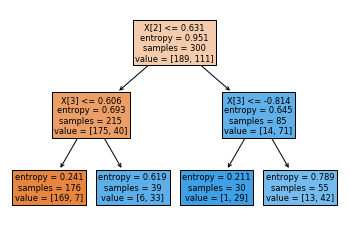

In [10]:
sklearn.tree.plot_tree(classifier, filled=True)
plt.show()

In [11]:
accuracy= metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
print(accuracy,recall,precision)

0.94 0.9375 0.8823529411764706
